# Questão 5
Um problema interessante para testar a capacidade de uma rede neural atuar como classificado de padrões é o problema das duas espirais intercaladas. A espiral 1 sendo uma classe e a espiral 2 sendo outra classe. Gere os exemplos de treinamento usando as seguintes equações:

Espiral 1: $x = \frac{\theta}{4}\cos \theta$  e  $y = \frac{\theta}{4}\sin \theta$  sendo  $\theta\geq 0$

Espiral 2: $x = (\frac{\theta}{4}+0.8)\cos \theta$  e  $y = (\frac{\theta}{4}+0.8)\sin \theta$  com  $\theta\geq 0$

fazendo $\theta$ assumir 100 igualmente espaçados valores entre 0 e 20 radianos.

## Bibliotecas
Usamos a Keras, numpy e matplotlib apenas.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import keras.layers as kl
import keras.models as km

## Gerando dados de treino
Criamos e visualizamos o vetor de pontos no $R^{2}$. A curva azul entre os pontos não interfere em nada, foi desenhada só para auxiliar na interpretação.

**Obs.:** O gráfico não é polar, e sim cartesiano.

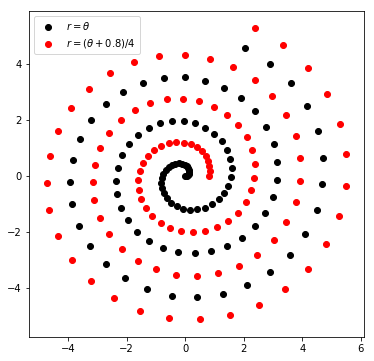

In [19]:
plt.figure(figsize=(6,6))
theta=np.linspace(0, 20, 100)
x1 = theta/4*np.cos(theta)
y1 = theta/4*np.sin(theta)
plt.scatter(x1,y1,c='black')  # Desenha classe 0 de preto

x2 = (theta/4+.8)*np.cos(theta)
y2 = (theta/4+.8)*np.sin(theta)
plt.scatter(x2,y2,c='red')  # Desenha classe 1 de vermelho

#x3 = (theta/4+.4)*np.cos(theta)
#y3 = (theta/4+.4)*np.sin(theta)
#plt.plot(x3,y3,c='blue')  # Desenha classe 1 de vermelho
plt.legend((r'$r=\theta$',r'$r=(\theta+0.8)/4$'), loc='upper left') #r'Separador ideal', 
plt.show()

x_treino,y_treino=[],[]
for v1,v2 in zip(x1,y1):
    x_treino.append(np.array([v1,v2]))
    y_treino.append([1,0])
for v1,v2 in zip(x2,y2):
    x_treino.append(np.array([v1,v2]))
    y_treino.append([0,1])
x_treino = np.array(x_treino)
y_treino = np.array(y_treino)

## Construindo rede neural
Também é compilada nessa célula, por isso a execução deve demorar. O argumento `verbose=0` garante que nada é impresso na tela.

A função de perda usada nesse problema foi a `categorical_crossentropy` dada, em sua versão para classificação binária, por: $$ BCE = \displaystyle-\frac{1}{N}\sum_{i=0}^{N}y_{i}\log (p_{i})+(1-y_{i})\log(1-p_{i})$$
[BCE](https://towardsdatascience.com/how-are-logistic-regression-ordinary-least-squares-regression-related-1deab32d79f5) = Binary Categorical Cross Entropy

y = probabilidade correta

p = probabilidade saída da rede neural

N = tamanho dos vetores

Como visto em algumas [fontes](https://blog.algorithmia.com/introduction-to-loss-functions/), esta função é bem eficaz nesta problema pois penaliza gravemente quando a rede apresenta a resposta muito errada.

Para problemas com mais de 2 classes, e.g.: classificação de algarismos (questão 4 desta lista), o erro é feito pela seguinte fórmula:
$$CCE = \displaystyle-\sum_{i=0}^{N}y_{i}\log (p_{i})$$

In [15]:
model = km.Sequential()
model.add(kl.Dense(60, input_dim=2, activation='relu'))
model.add(kl.Dense(60, activation='relu'))
model.add(kl.Dense(60, activation='relu'))
model.add(kl.Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # categorical_crossentropy é o recomendado para classificações excludentes

H = model.fit(x_treino, y_treino, epochs=350,verbose=0, batch_size=10)

## Validação
### Por histórico de erro

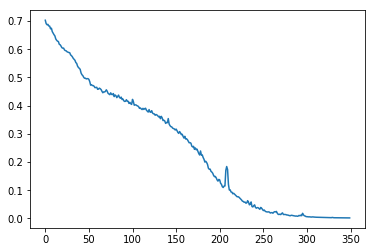

In [16]:
plt.plot(H.history['loss'])

### Por Inspeção

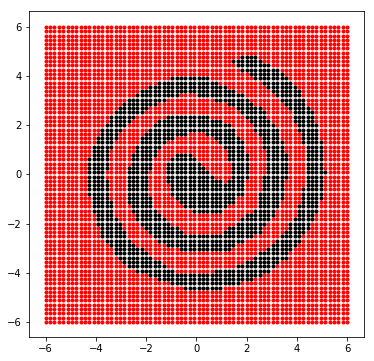

In [17]:
#Gerando dados de validação
qtd_pts = 70
x = np.linspace(-6, 6, qtd_pts)
y = np.linspace(-6, 6, qtd_pts)
xy = np.meshgrid(x,y)  # Realiza produto cartesiano discreto entre x e y

teste,rotulos = [],[]
for v1,v2 in zip(xy[0], xy[1]):  #v1 e v2 são as linhas das matrizes xy[0] e xy[1] respectivamente
    for a,b in zip(v1,v2):
        teste.append(np.array([a,b]))
teste = np.array(teste)
rotulos = model.predict_classes(teste)

cor = {0:'black', 1:'red'}
plt.figure(figsize=(6,6))
for i in range(teste.shape[0]):
    plt.scatter(teste[i][0], teste[i][1], marker='.', c=cor[rotulos[i]])
plt.show()

## Abordagem Utilizando SVM: Bibliotecas
As bibliotecas utilizadas para esse problema foram as seguintes: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## Funções Utilizadas
Para esse problema foram utilizadas as funções abaixo:

In [2]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = - 6, 6
    y_min, y_max = - 6, 6
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

## Dados de Treinamento
Foram gerados duzentos dados de treino, sendo os cem primeiros da classe 1 e os cem últimos da classe 2.

In [3]:
theta = np.linspace(0, 20, 100)

x1 = theta/4 * np.cos(theta)
y1 = theta/4 * np.sin(theta)

x2 = (theta/4 + 0.8) * np.cos(theta)
y2 = (theta/4 + 0.8) * np.sin(theta)

temp_x = np.array([x1, x2]).ravel()
temp_y = np.array([y1, y2]).ravel()
X = np.array([temp_x, temp_y]).T
y = []
for i in range(200):
    if i<100:
        y.append(1)
    else:
        y.append(2)
y = np.array(y)

## Solução do Problema
Para esse problema foi utilizado o kernel RBF e $C = 10000$.

In [4]:
clf = svm.SVC(kernel='rbf', C=10000)
clf.fit(X, y)

/home/victor/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Abaixo o plot dos vetores de suporte e da curva de decisão.

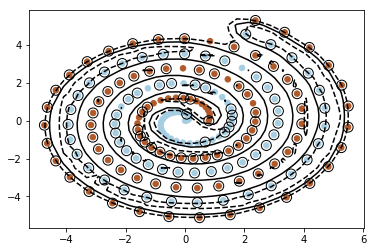

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=1,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [6]:
Outro plot é mostrado abaixo.

SyntaxError: invalid syntax (<ipython-input-6-2795f3a24801>, line 1)

In [ ]:
ax = plt.gca()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Kernel = RBF')

plt.show()

Utilizando um kernel linear o resultado foi o seguinte:

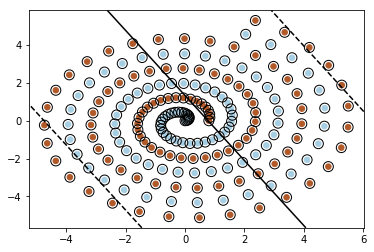

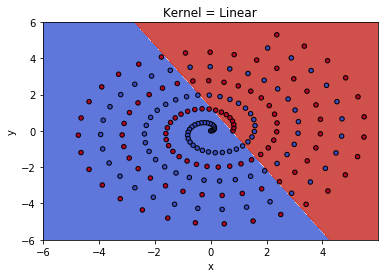

In [7]:
clf = svm.SVC(kernel='linear', C=10000)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=1,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

ax = plt.gca()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Kernel = Linear')

plt.show()